PyTorch integrates with TensorBoard, a tool designed for visualizing the results of neural network training runs. 

与tensorflow一样，PyTorch也可以可视化神经网络训练的结果

这一节 我们使用 Fashion-MNIST dataset 作为展示用的数据集，这个数据集收录在官方数据集库中，所以可以直接用torchvision.datasets加载数据

我们将会学习以下操作：
> 1. 读入数据并进行适当的转换（与先前的教程几乎相同）。
> 2. 设置TensorBoard。
> 3. 写入TensorBoard。
> 4. 使用TensorBoard检查模型架构。
> 5. 使用TensorBoard以更少的代码创建我们在上一个教程中创建的可视化的交互式版本

尤其对于第五点，我们具体会学习以下内容：
> - 检查我们的训练数据的几种方法
> - 在训练过程中如何跟踪模型的性能
> - 训练后如何评估模型的效果。

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
download_minist = True

if not(os.path.exists('./minist/')) or not os.listdir('./minist/'):
    download_minist = True
    
trainset = torchvision.datasets.FashionMNIST('./data',
    download=download_minist,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=download_minist,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=1)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=1)
# num_workers 表示有几个GPU,如果没有GPU，则设为1
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

接下来 我们建立一个简单的神经网络

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 1. 设置 Tensorboard

In [4]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# 2. 写入Tensorboard

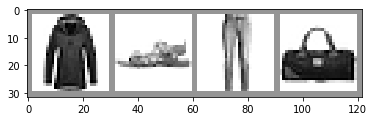

In [5]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

打开terminal,cd 到项目所在文件夹，运行下面的代码

In [ ]:
tensorboard --logdir=runs

访问网址 http://localhost:6006 就可以看到刚刚放进tensorboard里到4张图片

In [ ]:
writer.add_graph(net, images)
writer.close()